# Predicting Columns in a Table - Quick Start

Via a simple `fit()` call, AutoGluon can produce highly-accurate models to predict the values in one column of data table based on the rest of the columns' values (both classification and regression).
To see this in action, let's load first load training data from a CSV file into an AutoGluon Dataset object. This object is essentially equivalent to a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and all the same methods can be applied to both. 

In [1]:
import autogluon as ag
from autogluon import TabularPrediction as task

train_data = task.Dataset(file_path='https://autogluon.s3-us-west-2.amazonaws.com/datasets/AdultIncomeBinaryClassification/train_data.csv') # can be local CSV file as well, returns Pandas object.
train_data = train_data.head(500) # subsample 500 data points for faster demo
print(train_data.head())

/Users/jonasmue/virtual/ag/lib/python3.7/site-packages/botocore/vendored/requests/packages/urllib3/_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping
/Users/jonasmue/virtual/ag/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``

Loaded https://autogluon.s3-us-west-2.amazonaws.com/datasets/AdultIncomeBinaryClassification/train_data.csv | Columns = 15 / 15 | Rows = 39073  ->  39073
   age   workclass  fnlwgt   education  education-num       marital-status  \
0   25     Private  178478   Bachelors             13        Never-married   
1   23   State-gov   61743     5th-6th              3        Never-married   
2   46     Private  376789     HS-grad              9        Never-married   
3   55           ?  200235     HS-grad              9   Married-civ-spouse   
4   36     Private  224541     7th-8th              4   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Tech-support       Own-child   White   Female             0   
1    Transport-moving   Not-in-family   White     Male             0   
2       Other-service   Not-in-family   White     Male             0   
3                   ?         Husband   White     Male             0   
4   Handlers-clea

Note that we loaded data from a CSV file stored in the cloud (AWS s3 bucket), but you can you specify a local file-path instead if you have already downloaded the CSV file to your own machine (eg. using `wget`).
Each row in the table `train_data` corresponds to a single training example. In this particular dataset, each row corresponds to an individual person, and the columns contain various features reported during a census. 

Let's first try to use these features to predict whether the person's income exceeds 50K or not, which is recorded in the `class` column of this table.

In [2]:
label_column = 'class'
print(train_data[label_column].describe())

count        500
unique         2
top        <=50K
freq         394
Name: class, dtype: object


Now use AutoGluon to train some models:

First 10 unique y values: [' <=50K' ' >50K']

AutoGluon infers your prediction problem is: binary  (because only two unique label-values observed)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Binary label mappings: {' <=50K': 0, ' >50K': 1}
Feature Generator processed  500 data points with 14 features
Original Features:
	int features: 6
	object features: 8
Generated Features:
	int features: 0
All Features:
	int features: 6
	object features: 8
Total time taken in :  fit_transform 0.056304931640625
Saving agModels-predictClass/learner.pkl
Beginning hyperparameter tuning for Gradient Boosting Model...
Hyperparameter search space for Gradient Boosting Model: 
learning_rate:   Real: lower=0.005, upper=0.2
num_leaves:   Int: lower=16, upper=96
feature_fraction:   Real: lower=0.75, upper=1.0
min_data_in_leaf:   Int: lower=2, upper=30


Saving agModels-predictClass/models/GradientBoostClassifier/trial_0_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_1_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_2_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_3_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_4_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_5_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_6_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_7_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_8_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_9_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_10_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/trial_11_model.pkl
Saving agModels-predictClass/models/GradientBoostClassifier/tr

/Users/jonasmue/virtual/ag/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (450). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Saving agModels-predictClass/models/NeuralNetClassifier/train_tabNNdataset.pkl
Saving agModels-predictClass/models/NeuralNetClassifier/validation_tabNNdataset.pkl


Loading agModels-predictClass/models/NeuralNetClassifier/train_tabNNdataset.pkl
Loading agModels-predictClass/models/NeuralNetClassifier/validation_tabNNdataset.pkl
Saving agModels-predictClass/models/NeuralNetClassifier/trial_30_tabularNN.pkl
Loading agModels-predictClass/models/NeuralNetClassifier/train_tabNNdataset.pkl
Loading agModels-predictClass/models/NeuralNetClassifier/validation_tabNNdataset.pkl
Saving agModels-predictClass/models/NeuralNetClassifier/trial_31_tabularNN.pkl
Loading agModels-predictClass/models/NeuralNetClassifier/train_tabNNdataset.pkl
Loading agModels-predictClass/models/NeuralNetClassifier/validation_tabNNdataset.pkl
Saving agModels-predictClass/models/NeuralNetClassifier/trial_32_tabularNN.pkl


Please either provide filename or allow plot in get_training_curves


Time for TabularNN hyperparameter optimization: 117.74399995803833
Best hyperparameter configuration for Tabular Neural Network: 
{'activation.choice': 1, 'dropout_prob': 0.49233985577102257, 'embedding_size_factor': 1.3258963448673495, 'layers.choice': 2, 'learning_rate': 0.005295398401909552, 'network_type.choice': 0, 'use_batchnorm.choice': 0, 'weight_decay': 4.6910046179142064e-07}
Saving agModels-predictClass/models/trainer.pkl
Performance of GradientBoostClassifier_trial_0 model: 0.88
Performance of GradientBoostClassifier_trial_1 model: 0.9
Performance of GradientBoostClassifier_trial_10 model: 0.88
Performance of GradientBoostClassifier_trial_11 model: 0.88
Performance of GradientBoostClassifier_trial_12 model: 0.88
Performance of GradientBoostClassifier_trial_13 model: 0.9
Performance of GradientBoostClassifier_trial_14 model: 0.88
Performance of GradientBoostClassifier_trial_15 model: 0.88
Performance of GradientBoostClassifier_trial_16 model: 0.88
Performance of GradientBoos

Loading agModels-predictClass/models/GradientBoostClassifier/trial_16_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_20_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_21_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_22_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_24_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_25_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_26_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_27_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_28_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_29_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_3_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_4_model.pkl
Loading agModels-predictClass/models/Gradi

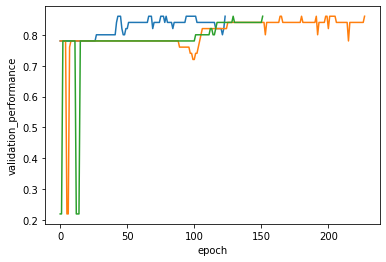

In [3]:
savedir = 'agModels-predictClass' # specifies folder where to store trained models
time_limits = 60 # train various models for about 60sec

predictor = task.fit(train_data=train_data, label=label_column, output_directory=savedir, time_limits=time_limits)

Next, load some separate test data to demonstrate how to make predictions on new examples at inference time:

In [5]:
test_data = task.Dataset(file_path='https://autogluon.s3-us-west-2.amazonaws.com/datasets/AdultIncomeBinaryClassification/test_data.csv')
y_test = test_data[label_column]
test_data = test_data.drop(labels=[label_column],axis=1) # delete label column to prove we are not cheating
print(test_data.head())

Loaded https://autogluon.s3-us-west-2.amazonaws.com/datasets/AdultIncomeBinaryClassification/test_data.csv | Columns = 15 / 15 | Rows = 9769  ->  9769
   age          workclass  fnlwgt      education  education-num  \
0   31            Private  169085           11th              7   
1   17   Self-emp-not-inc  226203           12th              8   
2   47            Private   54260      Assoc-voc             11   
3   21            Private  176262   Some-college             10   
4   17            Private  241185           12th              8   

        marital-status        occupation relationship    race      sex  \
0   Married-civ-spouse             Sales         Wife   White   Female   
1        Never-married             Sales    Own-child   White     Male   
2   Married-civ-spouse   Exec-managerial      Husband   White     Male   
3        Never-married   Exec-managerial    Own-child   White   Female   
4        Never-married    Prof-specialty    Own-child   White     Male   

 

We use our trained models to make predictions on the new data and then evaluate performance: 

In [6]:
predictor = task.load(savedir) # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data)
print("Predictions:  ", y_pred)
perf = predictor.evaluate(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Loading agModels-predictClass/learner.pkl
Loading agModels-predictClass/models/trainer.pkl
Total time taken in :  transform 0.024018049240112305
Loading agModels-predictClass/models/GradientBoostClassifier/trial_1_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_10_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_11_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_12_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_13_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_14_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_15_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_16_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_20_model.pkl
Loading agModels-predictClass/models/GradientBoostClassifier/trial_21_model.pkl
Loading agModels-predictClass/models/GradientBoostClassi

Now you're ready to try AutoGluon on your own tabular datasets!   
As long as they're stored in a popular format like CSV, you should be able to achieve strong predictive performance with just 2 lines of code:
```
from autogluon import TabularPrediction as task
predictor = task.fit(train_data=task.Dataset(file_path=<file-name>), label_column=<variable-name>)
```

## Description of fit():

Here we provide more details about what happened during `fit()`. 
Since there are only two possible values of the `class` variable, this was a binary classification problem, for which an appropriate performance metric is *accuracy*.
AutoGluon automatically infers all this as well as the type of each feature (ie. which columns contain continuous numbers vs. discrete categories), and can also automatically handle common issues like missing data and rescaling feature values.


As we did not specify separate validation data, AutoGluon automatically choses a random training/validation split of the data. 
Rather than just a single model, AutoGluon trains many models and ensembles them together to ensure superior predictive performance. 
By default, AutoGluon tries to fit neural networks and tree ensembles.
Each type of model has various hyperparameters, which the user would normally need to manually specify, but AutoGluon automatically finds values of these hyperparameters which produce the best performance on the validation data. This involves repeatedly training models under different hyperparameter settings and evaluating their performance, which can get computationally-intensive, so `fit()` can parallelize this process across multiple threads (and machines if distributed resources are available). To control runtimes, you can specify various arguments in fit(): `time_limits` which stops training new models after the specified amount of time (sec) has passed, `num_trials` which specifies how many hyperparameter configurations to try for each type of model. You can also make an individual training run of each model quicker by specifying appropriate arguments as demonstrated in the subsequent **In-Depth** tutorial.


For tabular problems, AutoGluon stores various information produced during `fit()` in a `Trainer` object.
We can use this object to view the validation accuracy of each individual model that was trained during `fit()`, as well as various model ensembles AutoGluon considered after the models were trained.

In [7]:
trainer = predictor.load_trainer()
print("AutoGluon trained %s models during fit(). Their validation performance is below:\n" % len(trainer.model_names))

print(trainer.model_performance)

Loading agModels-predictClass/models/trainer.pkl
AutoGluon trained 33 models during fit(). Their validation performance is below:

{'GradientBoostClassifier_trial_0': 0.88, 'GradientBoostClassifier_trial_1': 0.9, 'GradientBoostClassifier_trial_2': 0.9, 'GradientBoostClassifier_trial_3': 0.88, 'GradientBoostClassifier_trial_4': 0.88, 'GradientBoostClassifier_trial_5': 0.88, 'GradientBoostClassifier_trial_6': 0.88, 'GradientBoostClassifier_trial_7': 0.88, 'GradientBoostClassifier_trial_8': 0.9, 'GradientBoostClassifier_trial_9': 0.88, 'GradientBoostClassifier_trial_10': 0.88, 'GradientBoostClassifier_trial_11': 0.88, 'GradientBoostClassifier_trial_12': 0.88, 'GradientBoostClassifier_trial_13': 0.9, 'GradientBoostClassifier_trial_14': 0.88, 'GradientBoostClassifier_trial_15': 0.88, 'GradientBoostClassifier_trial_16': 0.88, 'GradientBoostClassifier_trial_17': 0.88, 'GradientBoostClassifier_trial_18': 0.9, 'GradientBoostClassifier_trial_19': 0.9, 'GradientBoostClassifier_trial_20': 0.88, 'G

We can also see what things AutoGluon inferred about our prediction task:

In [8]:
print("AutoGluon infers problem type is: ", trainer.problem_type)
print("AutoGluon categorized the features as: ", trainer.feature_types_metadata)

AutoGluon infers problem type is:  binary
AutoGluon categorized the features as:  {'nlp': [], 'vectorizers': [], 'int': ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], 'object': ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']}


We can also view extremely detailed information about the hyperparameter optimization process, including what was the best hyperparameter configuration for each type of model and how well each hyperparameter configuration performed on the validation data:

In [9]:
import pprint
pprint.PrettyPrinter(indent=2).pprint(trainer.hpo_results)

{ 'GradientBoostClassifier': { 'args': { 'boosting_type': 'gbdt',
                                         'dataset_train_filename': 'dataset_train.bin',
                                         'dataset_val_filename': 'dataset_val.bin',
                                         'directory': 'agModels-predictClass/models/GradientBoostClassifier/',
                                         'feature_fraction': 1.0,
                                         'learning_rate': 0.1,
                                         'lgb_model': <autogluon.tabular.ml.models.lgb.lgb_model.LGBModel object at 0x12c004790>,
                                         'metric': 'binary_logloss,binary_error',
                                         'min_data_in_leaf': 20,
                                         'num_boost_round': 10000,
                                         'num_leaves': 31,
                                         'num_threads': -1,
                                         'objective': 'bina

                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 97,
                                                                   'time_this_iter': 0.0023670196533203125,
                                                                   'train_loss': 0.168667499441428,
                                                                   'validation_performance': 0.88},
                                                                 { 'best_iter_sofar': 33,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 98,
                                                                   'time_this_iter': 0.0026760101318359375,
                                                                   'train_loss': 0.16754957501486628,
                                          

                                                                'learning_rate': 0.13719929746098475,
                                                                'min_data_in_leaf': 26,
                                                                'num_leaves': 57},
                                                    'history': [ { 'best_iter_sofar': 1,
                                                                   'best_valperf_sofar': 0.78,
                                                                   'epoch': 0,
                                                                   'time_this_iter': 0.1559302806854248,
                                                                   'train_loss': 0.4691861079026554,
                                                                   'validation_performance': 0.78},
                                                                 { 'best_iter_sofar': 1,
                                                                   'b

                                                                 { 'best_iter_sofar': 18,
                                                                   'best_valperf_sofar': 0.9,
                                                                   'epoch': 136,
                                                                   'time_this_iter': 0.002228975296020508,
                                                                   'train_loss': 0.025153350927087186,
                                                                   'validation_performance': 0.86},
                                                                 { 'best_iter_sofar': 18,
                                                                   'best_valperf_sofar': 0.9,
                                                                   'epoch': 137,
                                                                   'time_this_iter': 0.0022559165954589844,
                                                    

                                                                 { 'best_iter_sofar': 25,
                                                                   'best_valperf_sofar': 0.86,
                                                                   'epoch': 51,
                                                                   'time_this_iter': 0.002814054489135742,
                                                                   'train_loss': 0.2612289703844156,
                                                                   'validation_performance': 0.84},
                                                                 { 'best_iter_sofar': 25,
                                                                   'best_valperf_sofar': 0.86,
                                                                   'epoch': 52,
                                                                   'time_this_iter': 0.0027599334716796875,
                                                      

                                                                 { 'best_iter_sofar': 156,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 176,
                                                                   'time_this_iter': 0.002542257308959961,
                                                                   'train_loss': 0.09049204707927942,
                                                                   'validation_performance': 0.86},
                                                                 { 'best_iter_sofar': 156,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 177,
                                                                   'time_this_iter': 0.007982730865478516,
                                                  

                                                                   'best_valperf_sofar': 0.9,
                                                                   'epoch': 307,
                                                                   'time_this_iter': 0.0023453235626220703,
                                                                   'train_loss': 0.036723345048575,
                                                                   'validation_performance': 0.88},
                                                                 { 'best_iter_sofar': 202,
                                                                   'best_valperf_sofar': 0.9,
                                                                   'epoch': 308,
                                                                   'time_this_iter': 0.00273895263671875,
                                                                   'train_loss': 0.03653800922685982,
                                           

                                                                   'epoch': 55,
                                                                   'time_this_iter': 0.002804994583129883,
                                                                   'train_loss': 0.04071161933962273,
                                                                   'validation_performance': 0.84},
                                                                 { 'best_iter_sofar': 15,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 56,
                                                                   'time_this_iter': 0.002568960189819336,
                                                                   'train_loss': 0.03964476728631605,
                                                                   'validation_performance': 0.84},
                                     

                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 143,
                                                                   'time_this_iter': 0.002407073974609375,
                                                                   'train_loss': 0.0024272607539887444,
                                                                   'validation_performance': 0.88},
                                                                 { 'best_iter_sofar': 15,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 144,
                                                                   'time_this_iter': 0.002437114715576172,
                                                                   'train_loss': 0.0023744449290087548,
                                    

                                                                   'validation_performance': 0.86},
                                                                 { 'best_iter_sofar': 56,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 80,
                                                                   'time_this_iter': 0.0022821426391601562,
                                                                   'train_loss': 0.25434795961054135,
                                                                   'validation_performance': 0.86},
                                                                 { 'best_iter_sofar': 56,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 81,
                                                            

                                                    'history': [ { 'best_iter_sofar': 1,
                                                                   'best_valperf_sofar': 0.78,
                                                                   'epoch': 0,
                                                                   'time_this_iter': 0.13457679748535156,
                                                                   'train_loss': 0.5124927861267063,
                                                                   'validation_performance': 0.78},
                                                                 { 'best_iter_sofar': 1,
                                                                   'best_valperf_sofar': 0.78,
                                                                   'epoch': 1,
                                                                   'time_this_iter': 0.0039789676666259766,
                                                           

                                                                   'train_loss': 0.34164760149457934,
                                                                   'validation_performance': 0.8},
                                                                 { 'best_iter_sofar': 78,
                                                                   'best_valperf_sofar': 0.8,
                                                                   'epoch': 120,
                                                                   'time_this_iter': 0.0023980140686035156,
                                                                   'train_loss': 0.34079402328638075,
                                                                   'validation_performance': 0.8},
                                                                 { 'best_iter_sofar': 122,
                                                                   'best_valperf_sofar': 0.82,
                                       

                                                                 { 'best_iter_sofar': 252,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 252,
                                                                   'time_this_iter': 0.0023698806762695312,
                                                                   'train_loss': 0.25727438854740065,
                                                                   'validation_performance': 0.88},
                                                                 { 'best_iter_sofar': 252,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 253,
                                                                   'time_this_iter': 0.002251148223876953,
                                                 

                                                                   'train_loss': 0.4950908976231451,
                                                                   'validation_performance': 0.78},
                                                                 { 'best_iter_sofar': 1,
                                                                   'best_valperf_sofar': 0.78,
                                                                   'epoch': 8,
                                                                   'time_this_iter': 0.0024569034576416016,
                                                                   'train_loss': 0.4927620116424739,
                                                                   'validation_performance': 0.78},
                                                                 { 'best_iter_sofar': 1,
                                                                   'best_valperf_sofar': 0.78,
                                           

                                                                 { 'best_iter_sofar': 134,
                                                                   'best_valperf_sofar': 0.84,
                                                                   'epoch': 159,
                                                                   'time_this_iter': 0.0022690296173095703,
                                                                   'train_loss': 0.32011653709215226,
                                                                   'validation_performance': 0.84},
                                                                 { 'best_iter_sofar': 134,
                                                                   'best_valperf_sofar': 0.84,
                                                                   'epoch': 160,
                                                                   'time_this_iter': 0.0024607181549072266,
                                                

                                                                 { 'best_iter_sofar': 281,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 309,
                                                                   'time_this_iter': 0.002262115478515625,
                                                                   'train_loss': 0.24148954900404884,
                                                                   'validation_performance': 0.88},
                                                                 { 'best_iter_sofar': 281,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 310,
                                                                   'time_this_iter': 0.002274751663208008,
                                                  

                                                                   'train_loss': 0.4334196593483615,
                                                                   'validation_performance': 0.78},
                                                                 { 'best_iter_sofar': 1,
                                                                   'best_valperf_sofar': 0.78,
                                                                   'epoch': 23,
                                                                   'time_this_iter': 0.00251007080078125,
                                                                   'train_loss': 0.4307112110117529,
                                                                   'validation_performance': 0.78},
                                                                 { 'best_iter_sofar': 1,
                                                                   'best_valperf_sofar': 0.78,
                                            

                                                                   'validation_performance': 0.86},
                                                                 { 'best_iter_sofar': 94,
                                                                   'best_valperf_sofar': 0.86,
                                                                   'epoch': 148,
                                                                   'time_this_iter': 0.002749919891357422,
                                                                   'train_loss': 0.25845689996948584,
                                                                   'validation_performance': 0.86},
                                                                 { 'best_iter_sofar': 94,
                                                                   'best_valperf_sofar': 0.86,
                                                                   'epoch': 149,
                                                           

                                                                   'validation_performance': 0.86},
                                                                 { 'best_iter_sofar': 221,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 285,
                                                                   'time_this_iter': 0.0022368431091308594,
                                                                   'train_loss': 0.18071180099295914,
                                                                   'validation_performance': 0.84},
                                                                 { 'best_iter_sofar': 221,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 286,
                                                        

                                                                   'train_loss': 0.1705953844124023,
                                                                   'validation_performance': 0.88},
                                                                 { 'best_iter_sofar': 16,
                                                                   'best_valperf_sofar': 0.9,
                                                                   'epoch': 25,
                                                                   'time_this_iter': 0.002363920211791992,
                                                                   'train_loss': 0.1664759952950212,
                                                                   'validation_performance': 0.88},
                                                                 { 'best_iter_sofar': 16,
                                                                   'best_valperf_sofar': 0.9,
                                           

                                                                   'best_valperf_sofar': 0.9,
                                                                   'epoch': 80,
                                                                   'time_this_iter': 0.0022542476654052734,
                                                                   'train_loss': 0.04561760339986364,
                                                                   'validation_performance': 0.84},
                                                                 { 'best_iter_sofar': 16,
                                                                   'best_valperf_sofar': 0.9,
                                                                   'epoch': 81,
                                                                   'time_this_iter': 0.002269744873046875,
                                                                   'train_loss': 0.04482703821233891,
                                           

                                                                   'train_loss': 0.0030282842220146697,
                                                                   'validation_performance': 0.82},
                                                                 { 'best_iter_sofar': 15,
                                                                   'best_valperf_sofar': 0.88,
                                                                   'epoch': 108,
                                                                   'time_this_iter': 0.0023288726806640625,
                                                                   'train_loss': 0.00290763624325136,
                                                                   'validation_performance': 0.82},
                                                                 { 'best_iter_sofar': 15,
                                                                   'best_valperf_sofar': 0.88,
                                   

                                                                    'train_loss': 0.40360313507250933,
                                                                    'validation_performance': 0.78},
                                                                  { 'best_iter_sofar': 1,
                                                                    'best_valperf_sofar': 0.78,
                                                                    'epoch': 88,
                                                                    'time_this_iter': 0.0022537708282470703,
                                                                    'train_loss': 0.4027324453722774,
                                                                    'validation_performance': 0.78},
                                                                  { 'best_iter_sofar': 1,
                                                                    'best_valperf_sofar': 0.78,
                               

                                                                    'validation_performance': 0.82},
                                                                  { 'best_iter_sofar': 168,
                                                                    'best_valperf_sofar': 0.82,
                                                                    'epoch': 197,
                                                                    'time_this_iter': 0.002202749252319336,
                                                                    'train_loss': 0.334900276379912,
                                                                    'validation_performance': 0.82},
                                                                  { 'best_iter_sofar': 168,
                                                                    'best_valperf_sofar': 0.82,
                                                                    'epoch': 198,
                                                 

                                                                    'validation_performance': 0.86},
                                                                  { 'best_iter_sofar': 265,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 350,
                                                                    'time_this_iter': 0.002476930618286133,
                                                                    'train_loss': 0.2681254922832655,
                                                                    'validation_performance': 0.86},
                                                                  { 'best_iter_sofar': 265,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 351,
                                                

                                                                    'train_loss': 0.38567094703323,
                                                                    'validation_performance': 0.78},
                                                                  { 'best_iter_sofar': 1,
                                                                    'best_valperf_sofar': 0.78,
                                                                    'epoch': 69,
                                                                    'time_this_iter': 0.0027451515197753906,
                                                                    'train_loss': 0.3842519370769486,
                                                                    'validation_performance': 0.78},
                                                                  { 'best_iter_sofar': 1,
                                                                    'best_valperf_sofar': 0.78,
                                  

                                                                    'train_loss': 0.24585231027462548,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 195,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 226,
                                                                    'time_this_iter': 0.004029989242553711,
                                                                    'train_loss': 0.24515431018180267,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 195,
                                                                    'best_valperf_sofar': 0.88,
                          

                                                                  { 'best_iter_sofar': 23,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 36,
                                                                    'time_this_iter': 0.002717256546020508,
                                                                    'train_loss': 0.2540996106038367,
                                                                    'validation_performance': 0.86},
                                                                  { 'best_iter_sofar': 23,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 37,
                                                                    'time_this_iter': 0.0035729408264160156,
                                            

                                               13: { 'config': { 'feature_fraction': 0.9698753551271819,
                                                                 'learning_rate': 0.014253936514953078,
                                                                 'min_data_in_leaf': 7,
                                                                 'num_leaves': 83},
                                                     'history': [ { 'best_iter_sofar': 1,
                                                                    'best_valperf_sofar': 0.78,
                                                                    'epoch': 0,
                                                                    'time_this_iter': 0.1271669864654541,
                                                                    'train_loss': 0.5078719381317411,
                                                                    'validation_performance': 0.78},
                                            

                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 133,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 146,
                                                                    'time_this_iter': 0.004377126693725586,
                                                                    'train_loss': 0.1346299986619791,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 133,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 147,
                                                

                                                                    'epoch': 301,
                                                                    'time_this_iter': 0.002866029739379883,
                                                                    'train_loss': 0.04527814002987701,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 169,
                                                                    'best_valperf_sofar': 0.9,
                                                                    'epoch': 302,
                                                                    'time_this_iter': 0.002568960189819336,
                                                                    'train_loss': 0.044917341433300506,
                                                                    'validation_performance': 0.88},
                        

                                                                  { 'best_iter_sofar': 56,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 120,
                                                                    'time_this_iter': 0.002470254898071289,
                                                                    'train_loss': 0.17200789594476287,
                                                                    'validation_performance': 0.86},
                                                                  { 'best_iter_sofar': 56,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 121,
                                                                    'time_this_iter': 0.002470731735229492,
                                          

                                                                    'time_this_iter': 0.002494335174560547,
                                                                    'train_loss': 0.3051803370187185,
                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 53,
                                                                    'best_valperf_sofar': 0.84,
                                                                    'epoch': 58,
                                                                    'time_this_iter': 0.0023908615112304688,
                                                                    'train_loss': 0.30287666077400976,
                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 53,
                 

                                                                  { 'best_iter_sofar': 103,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 210,
                                                                    'time_this_iter': 0.002446889877319336,
                                                                    'train_loss': 0.12013593310639761,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 103,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 211,
                                                                    'time_this_iter': 0.0024559497833251953,
                                       

                                                                    'best_valperf_sofar': 0.8,
                                                                    'epoch': 105,
                                                                    'time_this_iter': 0.0024538040161132812,
                                                                    'train_loss': 0.3645937312490384,
                                                                    'validation_performance': 0.8},
                                                                  { 'best_iter_sofar': 93,
                                                                    'best_valperf_sofar': 0.8,
                                                                    'epoch': 106,
                                                                    'time_this_iter': 0.0023369789123535156,
                                                                    'train_loss': 0.36374080841135065,
                                

                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 284,
                                                                    'time_this_iter': 0.0034050941467285156,
                                                                    'train_loss': 0.24807186278974747,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 193,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 285,
                                                                    'time_this_iter': 0.0025887489318847656,
                                                                    'train_loss': 0.24751168196039425,
                           

                                                                    'train_loss': 0.1616612294752311,
                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 21,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 59,
                                                                    'time_this_iter': 0.0024580955505371094,
                                                                    'train_loss': 0.15980573731650544,
                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 21,
                                                                    'best_valperf_sofar': 0.88,
                             

                                                                    'epoch': 34,
                                                                    'time_this_iter': 0.0026519298553466797,
                                                                    'train_loss': 0.4240563584953621,
                                                                    'validation_performance': 0.78},
                                                                  { 'best_iter_sofar': 1,
                                                                    'best_valperf_sofar': 0.78,
                                                                    'epoch': 35,
                                                                    'time_this_iter': 0.007992982864379883,
                                                                    'train_loss': 0.4219919212768901,
                                                                    'validation_performance': 0.78},
                             

                                                                    'time_this_iter': 0.0025572776794433594,
                                                                    'train_loss': 0.24472433339620156,
                                                                    'validation_performance': 0.86},
                                                                  { 'best_iter_sofar': 144,
                                                                    'best_valperf_sofar': 0.9,
                                                                    'epoch': 209,
                                                                    'time_this_iter': 0.00798797607421875,
                                                                    'train_loss': 0.24410175423568672,
                                                                    'validation_performance': 0.86},
                                                                  { 'best_iter_sofar': 144,
               

                                                                  { 'best_iter_sofar': 35,
                                                                    'best_valperf_sofar': 0.86,
                                                                    'epoch': 71,
                                                                    'time_this_iter': 0.0025141239166259766,
                                                                    'train_loss': 0.218809229187192,
                                                                    'validation_performance': 0.86},
                                                                  { 'best_iter_sofar': 35,
                                                                    'best_valperf_sofar': 0.86,
                                                                    'epoch': 72,
                                                                    'time_this_iter': 0.0026221275329589844,
                                            

                                                                    'epoch': 259,
                                                                    'time_this_iter': 0.0027260780334472656,
                                                                    'train_loss': 0.041541021394850636,
                                                                    'validation_performance': 0.9},
                                                                  { 'best_iter_sofar': 141,
                                                                    'best_valperf_sofar': 0.9,
                                                                    'epoch': 260,
                                                                    'time_this_iter': 0.0025458335876464844,
                                                                    'train_loss': 0.04117965479499076,
                                                                    'validation_performance': 0.9},
                        

                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 59,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 99,
                                                                    'time_this_iter': 0.002961874008178711,
                                                                    'train_loss': 0.24733588640550525,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 59,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 100,
                                                  

                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 52,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 71,
                                                                    'time_this_iter': 0.0024831295013427734,
                                                                    'train_loss': 0.2720592196018201,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 52,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 72,
                                                   

                                                                    'train_loss': 0.13374806947227164,
                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 118,
                                                                    'best_valperf_sofar': 0.9,
                                                                    'epoch': 230,
                                                                    'time_this_iter': 0.0025882720947265625,
                                                                    'train_loss': 0.1332724261098327,
                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 118,
                                                                    'best_valperf_sofar': 0.9,
                            

                                                                  { 'best_iter_sofar': 22,
                                                                    'best_valperf_sofar': 0.9,
                                                                    'epoch': 114,
                                                                    'time_this_iter': 0.0026519298553466797,
                                                                    'train_loss': 0.05027134336514107,
                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 22,
                                                                    'best_valperf_sofar': 0.9,
                                                                    'epoch': 115,
                                                                    'time_this_iter': 0.0029718875885009766,
                                          

                                                                    'train_loss': 0.024429345050157036,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 13,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 107,
                                                                    'time_this_iter': 0.004253864288330078,
                                                                    'train_loss': 0.024079883549904577,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 13,
                                                                    'best_valperf_sofar': 0.88,
                          

                                                                    'best_valperf_sofar': 0.86,
                                                                    'epoch': 113,
                                                                    'time_this_iter': 0.0026748180389404297,
                                                                    'train_loss': 0.24395277252309117,
                                                                    'validation_performance': 0.82},
                                                                  { 'best_iter_sofar': 61,
                                                                    'best_valperf_sofar': 0.86,
                                                                    'epoch': 114,
                                                                    'time_this_iter': 0.00273895263671875,
                                                                    'train_loss': 0.24275308258557174,
                              

                                                                    'time_this_iter': 0.0024137496948242188,
                                                                    'train_loss': 0.4777169257703873,
                                                                    'validation_performance': 0.78},
                                                                  { 'best_iter_sofar': 1,
                                                                    'best_valperf_sofar': 0.78,
                                                                    'epoch': 16,
                                                                    'time_this_iter': 0.0023071765899658203,
                                                                    'train_loss': 0.47569222792811905,
                                                                    'validation_performance': 0.78},
                                                                  { 'best_iter_sofar': 1,
                  

                                                                    'best_valperf_sofar': 0.84,
                                                                    'epoch': 179,
                                                                    'time_this_iter': 0.0025949478149414062,
                                                                    'train_loss': 0.30929246238877045,
                                                                    'validation_performance': 0.82},
                                                                  { 'best_iter_sofar': 141,
                                                                    'best_valperf_sofar': 0.84,
                                                                    'epoch': 180,
                                                                    'time_this_iter': 0.002518892288208008,
                                                                    'train_loss': 0.30858105346118725,
                            

                                                                    'train_loss': 0.23211321059070905,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 274,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 345,
                                                                    'time_this_iter': 0.002403736114501953,
                                                                    'train_loss': 0.2317756511831226,
                                                                    'validation_performance': 0.88},
                                                                  { 'best_iter_sofar': 274,
                                                                    'best_valperf_sofar': 0.88,
                           

                                                                  { 'best_iter_sofar': 13,
                                                                    'best_valperf_sofar': 0.9,
                                                                    'epoch': 61,
                                                                    'time_this_iter': 0.0023958683013916016,
                                                                    'train_loss': 0.09001119980564802,
                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 13,
                                                                    'best_valperf_sofar': 0.9,
                                                                    'epoch': 62,
                                                                    'time_this_iter': 0.0023169517517089844,
                                            

                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 11,
                                                                    'best_valperf_sofar': 0.86,
                                                                    'epoch': 42,
                                                                    'time_this_iter': 0.0026922225952148438,
                                                                    'train_loss': 0.12171889672718475,
                                                                    'validation_performance': 0.84},
                                                                  { 'best_iter_sofar': 11,
                                                                    'best_valperf_sofar': 0.86,
                                                                    'epoch': 43,
                                                  

                                                     'history': [ { 'best_iter_sofar': 1,
                                                                    'best_valperf_sofar': 0.78,
                                                                    'epoch': 0,
                                                                    'time_this_iter': 0.1348109245300293,
                                                                    'train_loss': 0.49837221764207895,
                                                                    'validation_performance': 0.78},
                                                                  { 'best_iter_sofar': 1,
                                                                    'best_valperf_sofar': 0.78,
                                                                    'epoch': 1,
                                                                    'time_this_iter': 0.0047757625579833984,
                                                 

                                                                    'directory': 'agModels-predictClass/models/GradientBoostClassifier/',
                                                                    'done': True,
                                                                    'epoch': 10001,
                                                                    'file_prefix': 'trial_28_',
                                                                    'time_this_iter': 0.03786826133728027,
                                                                    'train_loss': 0.11204611659647916,
                                                                    'trial_model_file': 'agModels-predictClass/models/GradientBoostClassifier/trial_28_model.pkl'}],
                                                     'metadata': { 'best_iteration': 66,
                                                                   'directory': 'agModels-predictClass/models/GradientBoostClassifier/',

                                                                  { 'best_iter_sofar': 48,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 141,
                                                                    'time_this_iter': 0.0023250579833984375,
                                                                    'train_loss': 0.1319922340486939,
                                                                    'validation_performance': 0.86},
                                                                  { 'best_iter_sofar': 48,
                                                                    'best_valperf_sofar': 0.88,
                                                                    'epoch': 142,
                                                                    'time_this_iter': 0.002395153045654297,
                                          

                                                              { 'epoch': 101,
                                                                'time_this_iter': 0.12033581733703613,
                                                                'train_loss': 0.1770546637641059,
                                                                'validation_performance': 0.86},
                                                              { 'epoch': 102,
                                                                'time_this_iter': 0.10747599601745605,
                                                                'train_loss': 0.20057769775390624,
                                                                'validation_performance': 0.84},
                                                              { 'epoch': 103,
                                                                'time_this_iter': 0.09511804580688477,
                                                                't

                                                              { 'epoch': 139,
                                                                'time_this_iter': 0.2722759246826172,
                                                                'train_loss': 0.29183064778645834,
                                                                'validation_performance': 0.84},
                                                              { 'epoch': 140,
                                                                'time_this_iter': 0.2639789581298828,
                                                                'train_loss': 0.29218505859375,
                                                                'validation_performance': 0.84},
                                                              { 'epoch': 141,
                                                                'time_this_iter': 0.2543022632598877,
                                                                'train_

                                                              { 'epoch': 122,
                                                                'time_this_iter': 0.3044259548187256,
                                                                'train_loss': 0.44846076117621525,
                                                                'validation_performance': 0.84},
                                                              { 'epoch': 123,
                                                                'time_this_iter': 0.28758811950683594,
                                                                'train_loss': 0.4446720038519965,
                                                                'validation_performance': 0.84},
                                                              { 'epoch': 124,
                                                                'time_this_iter': 0.28617191314697266,
                                                                'tr

To demonstrate that `fit()` can also automatically handle regression tasks, we now try to predict the `age` variable in the table based on the other features.
Here, we run a quicker `fit()` that simply trains one model of each type without any hyperparameter optimization. 

In [10]:
label_column = 'age'
print(train_data[label_column].describe())

predictor_educ = task.fit(train_data=train_data, output_directory="agModels-predictEducation", 
                          label=label_column, hyperparameter_tune=False)

count    500.00000
mean      38.31400
std       13.85436
min       17.00000
25%       27.00000
50%       37.00000
75%       47.00000
max       90.00000
Name: age, dtype: float64
First 10 unique y values: [25 23 46 55 36 51 33 18 43 41]

AutoGluon infers your prediction problem is: regression  (because dtype of label-column == int and many unique label-values observed)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Feature Generator processed  500 data points with 14 features
Original Features:
	object features: 9
	int features: 5
Generated Features:
	int features: 0
All Features:
	object features: 9
	int features: 5
Total time taken in :  fit_transform 0.09526491165161133
Saving agModels-predictEducation/learner.pkl
training GradientBoostRegressor
fitting GradientBoostRegressor ...
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{

/Users/jonasmue/virtual/ag/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (450). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Training data has: 450 examples, 14 features (7 vector, 7 embedding, 0 language)
Training tabular Neural Network for up to 300 epochs...
Epoch 0.  Train loss: 5.871248914930556, Val root_mean_squared_error: -17.13448715209961
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(9 -> 163, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(8 -> 5, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(16 -> 7, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(7 -> 4, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(15 -> 7, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(7 -> 4, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(6 -> 4, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(18 -> 8, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamm

Epoch 74.  Train loss: 1.7749522569444445, Val root_mean_squared_error: -12.854114532470703
Epoch 75.  Train loss: 1.8613007269965278, Val root_mean_squared_error: -12.764366149902344
Epoch 76.  Train loss: 1.8544109429253472, Val root_mean_squared_error: -12.691871643066406
Epoch 77.  Train loss: 1.841491427951389, Val root_mean_squared_error: -12.754952430725098
Epoch 78.  Train loss: 1.689494900173611, Val root_mean_squared_error: -12.877607345581055
Epoch 79.  Train loss: 1.7571995713975694, Val root_mean_squared_error: -13.009257316589355
Epoch 80.  Train loss: 1.7364537217881943, Val root_mean_squared_error: -13.080971717834473
Epoch 81.  Train loss: 1.77072509765625, Val root_mean_squared_error: -13.146313667297363
Epoch 82.  Train loss: 1.7675968424479167, Val root_mean_squared_error: -13.064274787902832
Epoch 83.  Train loss: 1.7788235134548611, Val root_mean_squared_error: -13.019622802734375
Epoch 84.  Train loss: 1.7647300889756945, Val root_mean_squared_error: -12.94878768

Finally, we need to shutdown AutoGluon's remote workers which `fit()` uses to train multiple models simultaneously in multi-thread / distributed settings. 
**Important:** you must always execute `ag.done()` after you are done with using AutoGluon in a Python session or Jupyter notebook, as it may not work properly in a new session/notebook otherwise.  After executing `ag.done()` you cannot call `fit()` anymore  without starting a new Python session or notebook. 
If you face strange errors at any point in these tutorials, we recommend calling `ag.done()` and then restarting the notebook kernel.

In [11]:
ag.done()

**TODO**: Show plots summarizing fit() instead of the dump above. Move the dump to In-Depth tutorial.